In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [27]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv("fcc-forum-pageviews.csv")
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)



In [21]:
# Clean data
df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

In [22]:
def draw_line_plot():
    # Draw line plot
    # Create a line chart
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(df.index, df['value'], color='r')
    
    # Set title and axis labels
    ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    ax.set_xlabel("Date")
    ax.set_ylabel("Page Views")
    
    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

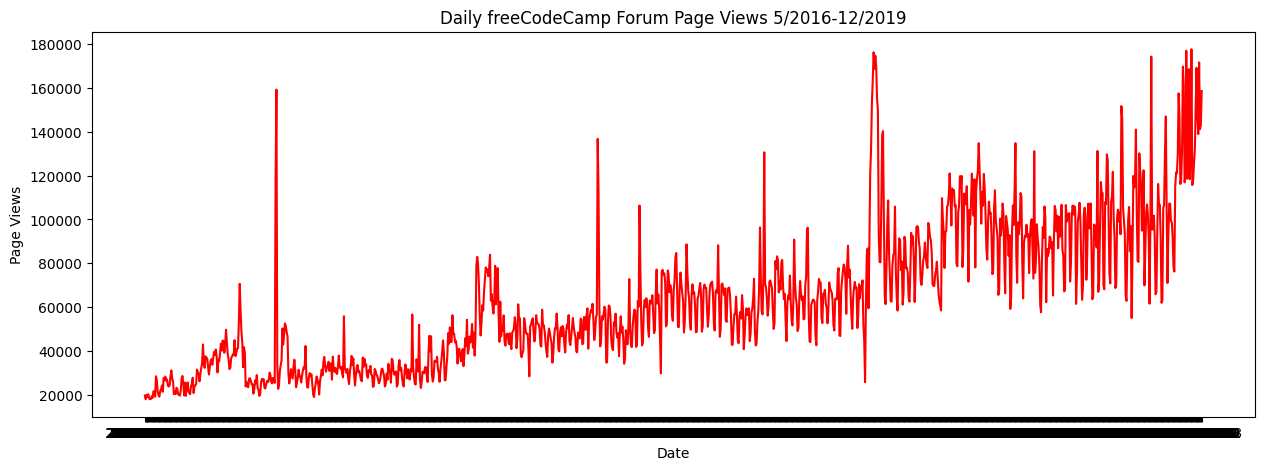

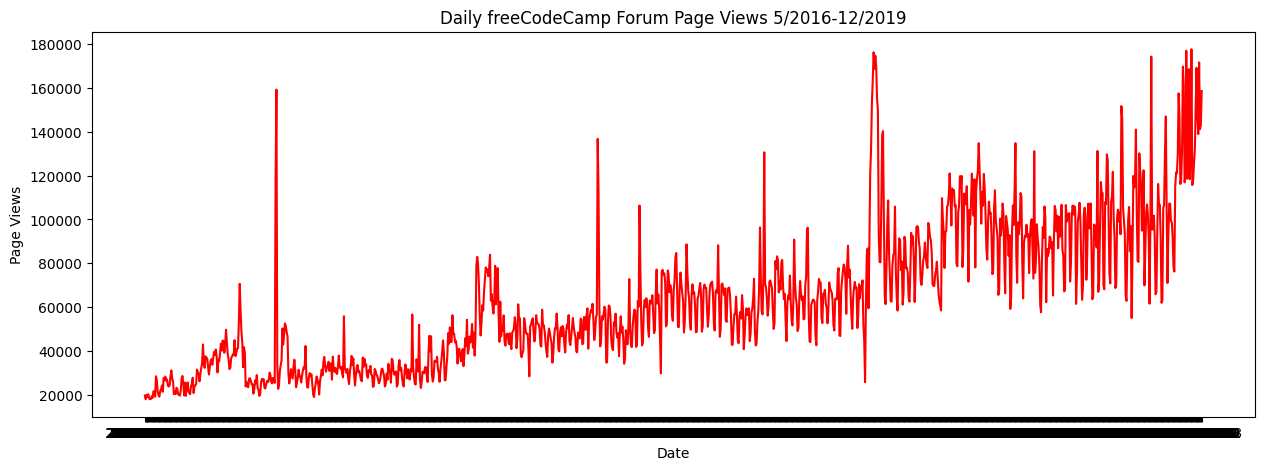

In [10]:
draw_line_plot()

In [28]:
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [29]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.groupby([df.index.year, df.index.month]).mean()
    


    # Draw bar plot
    # Convert multi-index to columns
    df_bar = df_bar.unstack()
    
    # Create a bar chart
    fig, ax = plt.subplots(figsize=(15, 5))
    df_bar.plot(kind='bar', ax=ax)
    
    # Set title and axis labels
    ax.set_title("Average Daily freeCodeCamp Forum Page Views")
    ax.set_xlabel("Years")
    ax.set_ylabel("Average Page Views")
    
    # Set the legend
    ax.legend(title="Months", loc='upper left')
    ax.get_legend().set_title("Months")





    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

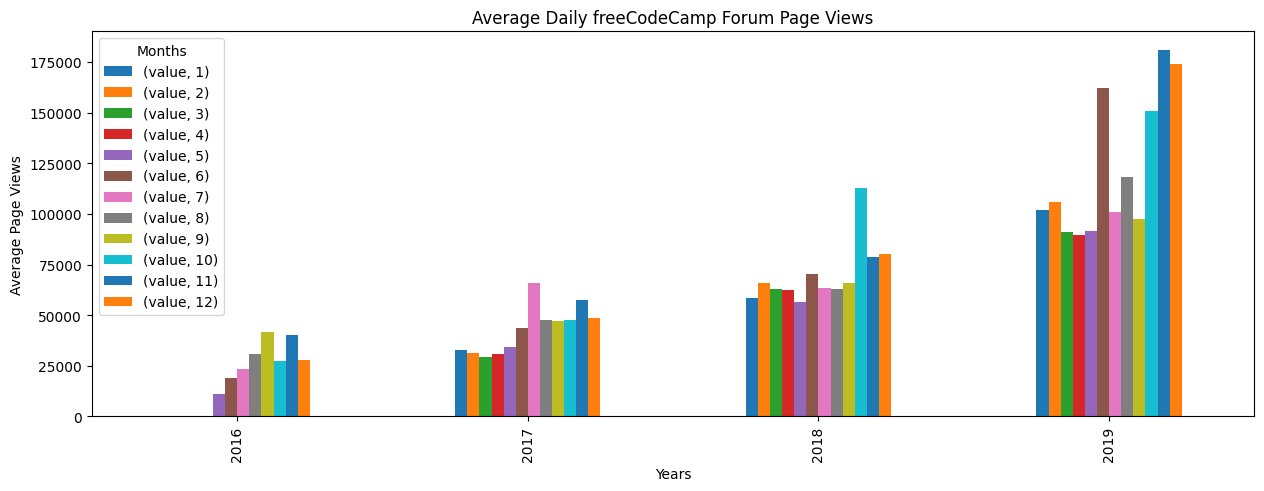

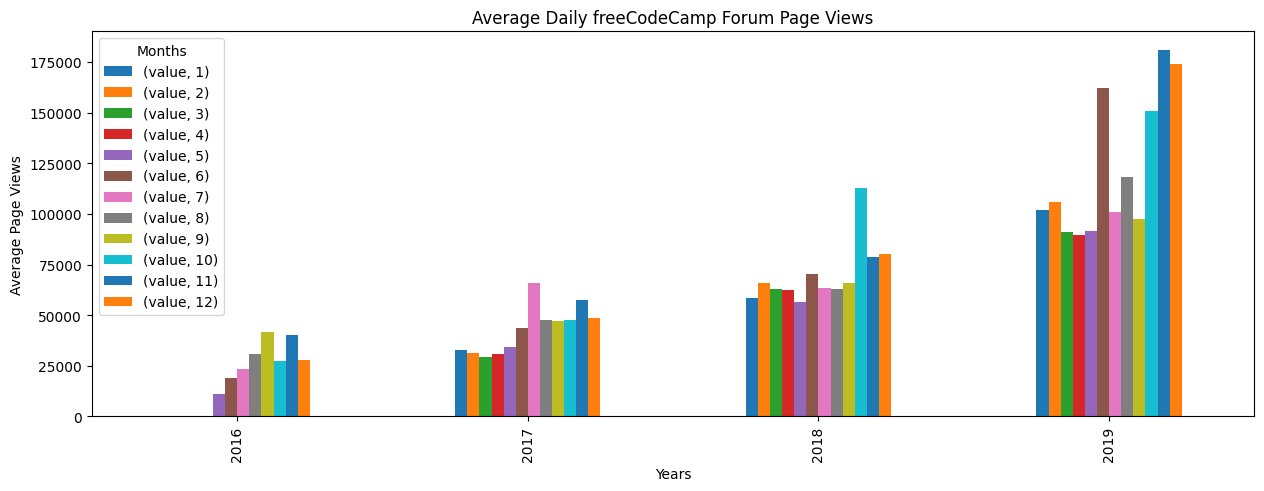

In [30]:
draw_bar_plot()

In [31]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_clean = df.copy()
    df_clean.reset_index(inplace=True)
    df_clean['year'] = [d.year for d in df_clean.date]
    df_clean['month'] = [d.strftime('%b') for d in df_clean.date]

    # Draw box plots (using Seaborn)
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    sns.boxplot(x="year", y="value", data=df_clean, ax=axes[0])
    sns.boxplot(x="month", y="value", data=df_clean, ax=axes[1], order=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
    axes[0].set_title("Year-wise Box Plot (Trend)")
    axes[0].set_xlabel("Year")
    axes[0].set_ylabel("Page Views")
    axes[1].set_title("Month-wise Box Plot (Seasonality)")
    axes[1].set_xlabel("Month")
    axes[1].set_ylabel("Page Views")





    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig

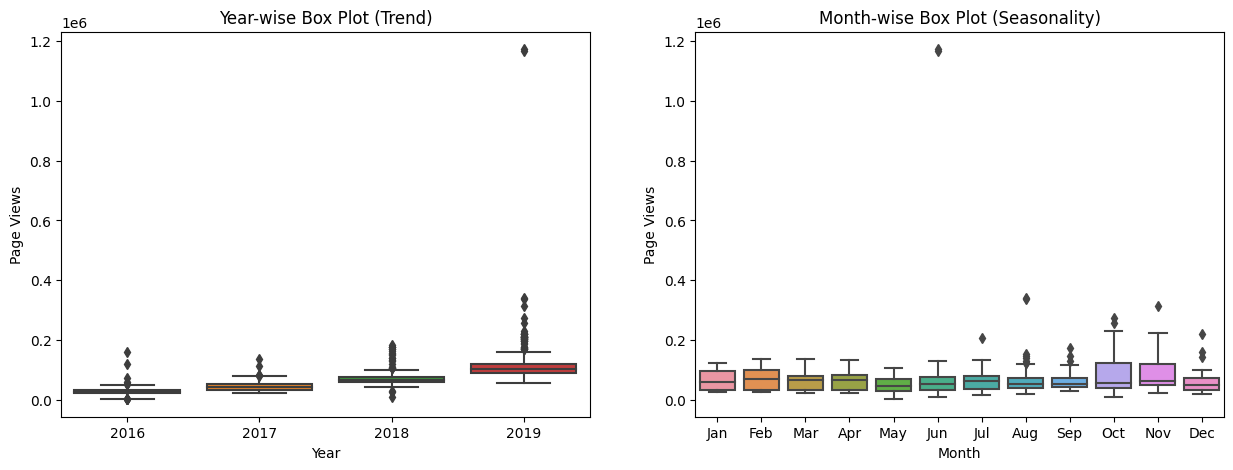

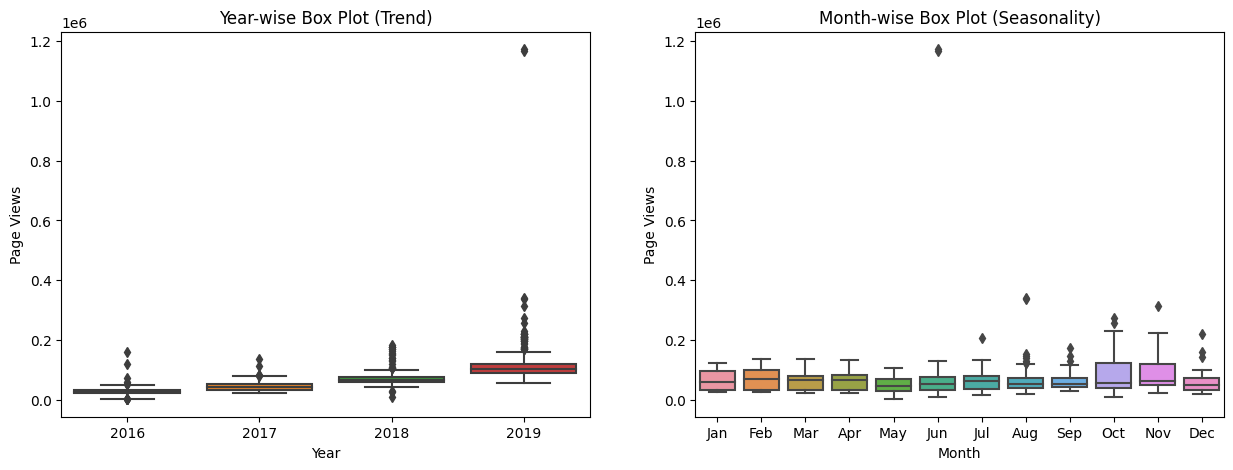

In [32]:
draw_box_plot()